In [ ]:
import pandas as pd

file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/movies_data_cleaned_single_sheet_cleaned.xlsx'
movies_data = pd.read_excel(file_path)

movies_data['Production Cost'] = pd.to_numeric(movies_data['Production Cost'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

genres_revenue_summary = movies_data.groupby('Genres').agg(
    Number_of_Movies=('Movie Title', 'size'),
    Average_Production_Cost_Millions=('Production Cost', lambda x: x.mean() / 1e6),
    Average_Distributor_Revenue_Millions=('Distributor', lambda x: x.mean() / 1e6)
).reset_index()

# Mostrar el resultado
print(genres_revenue_summary)


         Genres  Number_of_Movies  Average_Production_Cost_Millions  \
0        Action              1419                         22.603949   
1     Adventure               494                         21.238521   
2     Animation                44                          5.109310   
3     Biography               317                          4.902151   
4        Comedy              1531                          7.282032   
5         Crime               274                          5.619450   
6   Documentary               227                          1.600659   
7         Drama               754                          4.968584   
8        Family                 6                          1.076764   
9       Fantasy                20                         11.599258   
10       Horror               218                         10.465547   
11        Music                12                          0.505655   
12      Mystery                 9                         12.143851   
13    

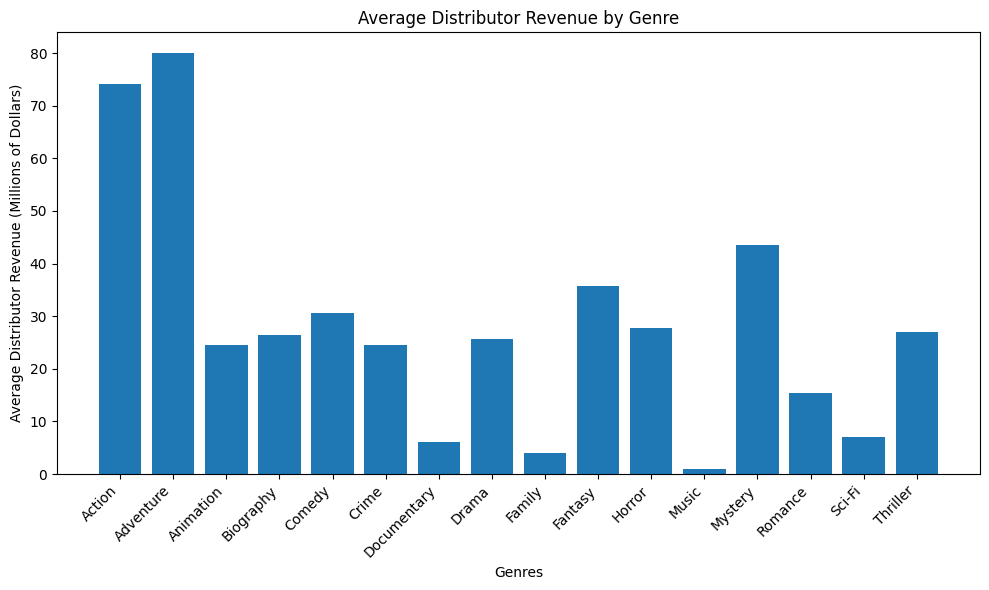

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/movies_data_cleaned_single_sheet_cleaned.xlsx'
movies_data = pd.read_excel(file_path)

movies_data['Production Cost'] = pd.to_numeric(movies_data['Production Cost'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

genres_revenue_summary = movies_data.groupby('Genres').agg(
    Average_Distributor_Revenue_Millions=('Distributor', lambda x: x.mean() / 1e6)
).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genres_revenue_summary['Genres'], genres_revenue_summary['Average_Distributor_Revenue_Millions'])
plt.xlabel('Genres')
plt.ylabel('Average Distributor Revenue (Millions of Dollars)')
plt.title('Average Distributor Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

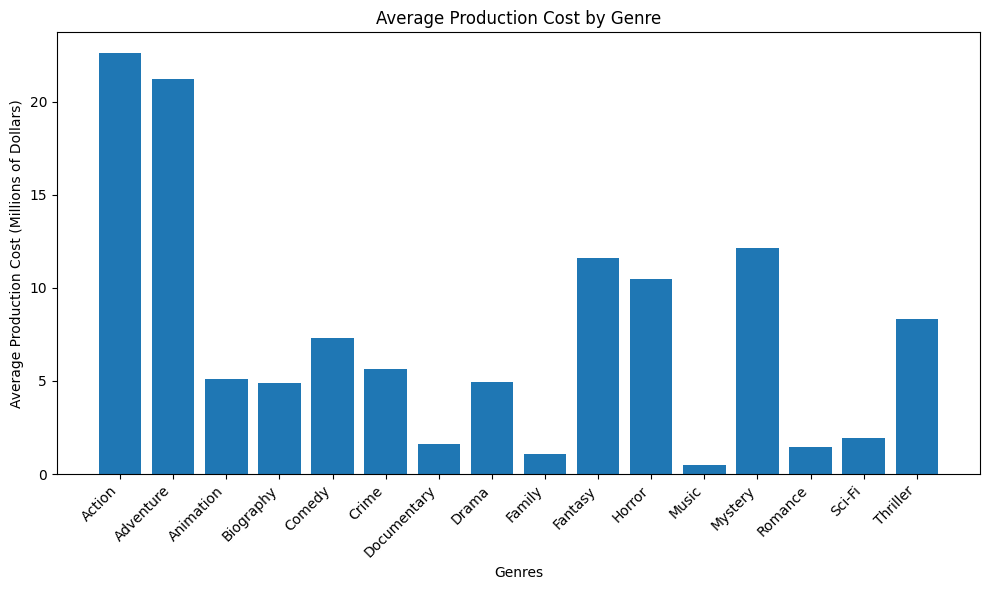

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/movies_data_cleaned_single_sheet_cleaned.xlsx'
movies_data = pd.read_excel(file_path)

movies_data['Production Cost'] = pd.to_numeric(movies_data['Production Cost'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

genres_cost_summary = movies_data.groupby('Genres').agg(
    Average_Production_Cost_Millions=('Production Cost', lambda x: x.mean() / 1e6)
).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genres_cost_summary['Genres'], genres_cost_summary['Average_Production_Cost_Millions'])
plt.xlabel('Genres')
plt.ylabel('Average Production Cost (Millions of Dollars)')
plt.title('Average Production Cost by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


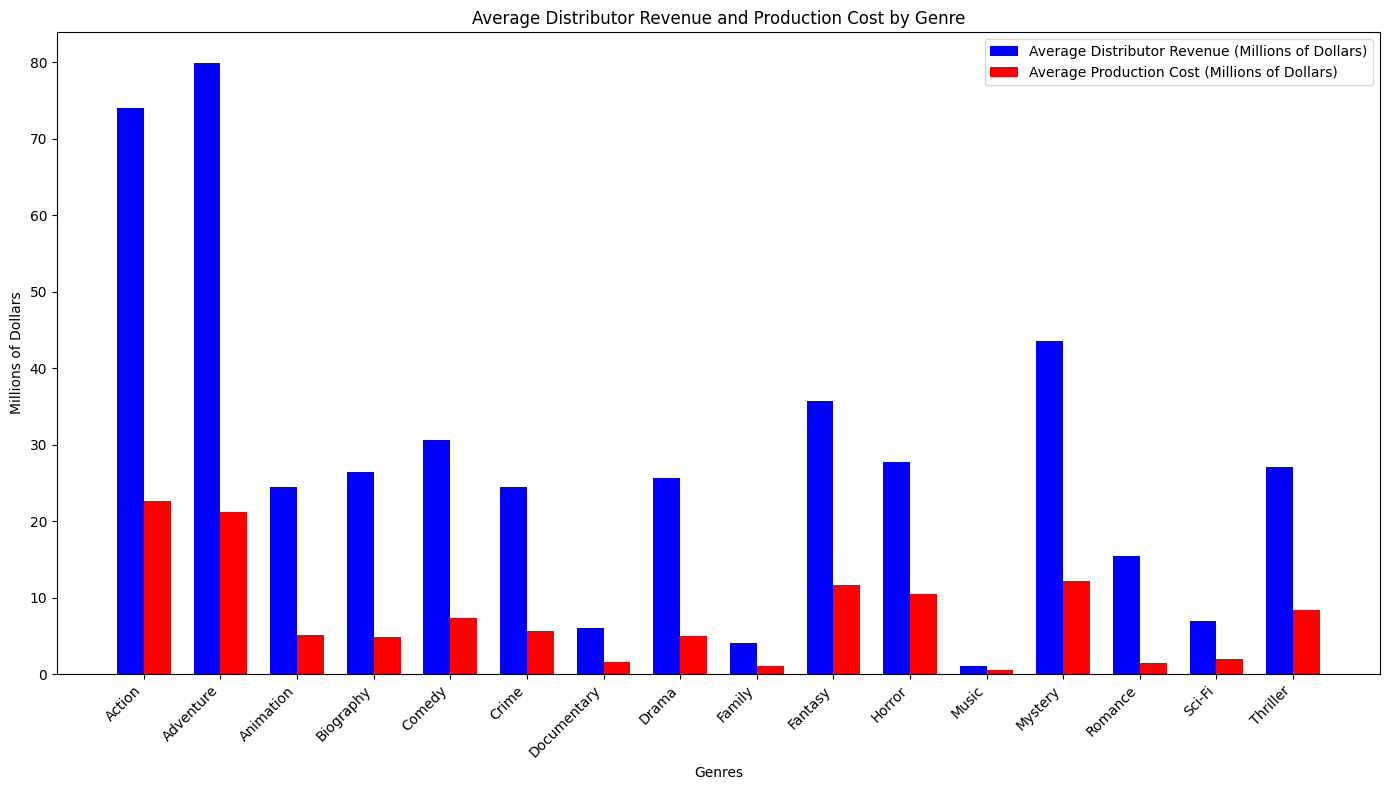

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/movies_data_cleaned_single_sheet_cleaned.xlsx'
movies_data = pd.read_excel(file_path)

movies_data['Production Cost'] = pd.to_numeric(movies_data['Production Cost'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

genres_revenue_summary = movies_data.groupby('Genres').agg(
    Average_Distributor_Revenue_Millions=('Distributor', lambda x: x.mean() / 1e6)
).reset_index()

genres_cost_summary = movies_data.groupby('Genres').agg(
    Average_Production_Cost_Millions=('Production Cost', lambda x: x.mean() / 1e6)
).reset_index()

merged_summary = genres_revenue_summary.merge(
    genres_cost_summary[['Genres', 'Average_Production_Cost_Millions']],
    on='Genres'
)

plt.figure(figsize=(14, 8))
x = np.arange(len(merged_summary['Genres']))
bar_width = 0.35

plt.bar(x - bar_width/2, merged_summary['Average_Distributor_Revenue_Millions'], width=bar_width, label='Average Distributor Revenue (Millions of Dollars)', color='blue')

plt.bar(x + bar_width/2, merged_summary['Average_Production_Cost_Millions'], width=bar_width, label='Average Production Cost (Millions of Dollars)', color='red')

plt.xlabel('Genres')
plt.ylabel('Millions of Dollars')
plt.title('Average Distributor Revenue and Production Cost by Genre')
plt.xticks(x, merged_summary['Genres'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

         Genres  Number_of_Movies  Average_Production_Cost_Millions  \
0        Action              1419                         22.603949   
1     Adventure               494                         21.238521   
2     Animation                44                          5.109310   
3     Biography               317                          4.902151   
4        Comedy              1531                          7.282032   
5         Crime               274                          5.619450   
6   Documentary               227                          1.600659   
7         Drama               754                          4.968584   
8        Family                 6                          1.076764   
9       Fantasy                20                         11.599258   
10       Horror               218                         10.465547   
11        Music                12                          0.505655   
12      Mystery                 9                         12.143851   
13    

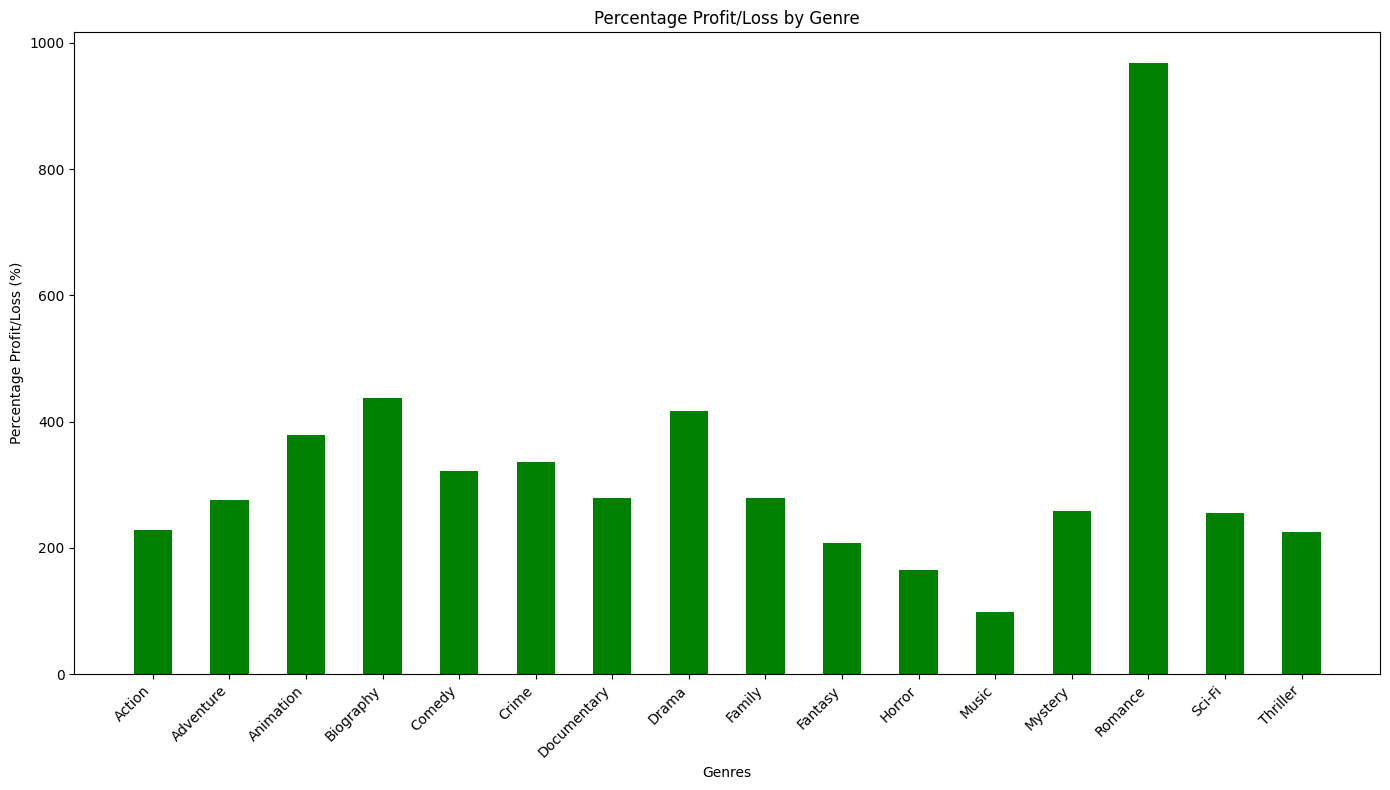

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde el archivo especificado
file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/movies_data_cleaned_single_sheet_cleaned.xlsx'
movies_data = pd.read_excel(file_path)

# Convertir las columnas a formato numérico, eliminando caracteres no deseados
movies_data['Production Cost'] = pd.to_numeric(movies_data['Production Cost'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

# Crear resúmenes por género
genres_revenue_summary = movies_data.groupby('Genres').agg(
    Number_of_Movies=('Movie Title', 'size'),
    Average_Production_Cost_Millions=('Production Cost', lambda x: x.mean() / 1e6),
    Average_Distributor_Revenue_Millions=('Distributor', lambda x: x.mean() / 1e6)
).reset_index()

# Calcular la ganancia o pérdida porcentual
genres_revenue_summary['Percentage_Profit_Loss'] = (
    (genres_revenue_summary['Average_Distributor_Revenue_Millions'] - genres_revenue_summary['Average_Production_Cost_Millions']) /
    genres_revenue_summary['Average_Production_Cost_Millions']
) * 100

# Imprimir el resumen actualizado
print(genres_revenue_summary)

# Visualizar los resultados con un gráfico de barras de la ganancia o pérdida porcentual
plt.figure(figsize=(14, 8))
x = np.arange(len(genres_revenue_summary['Genres']))
bar_width = 0.5

plt.bar(x, genres_revenue_summary['Percentage_Profit_Loss'], width=bar_width, color='green')
plt.xlabel('Genres')
plt.ylabel('Percentage Profit/Loss (%)')
plt.title('Percentage Profit/Loss by Genre')
plt.xticks(x, genres_revenue_summary['Genres'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/top_lifetime_gross_cleaned.xlsx'
new_movies_data = pd.read_excel(file_path)

new_movies_data['Lifetime Gross'] = pd.to_numeric(new_movies_data['Lifetime Gross'].replace('[\$,]', '', regex=True), errors='coerce')
new_movies_data['Distributor'] = pd.to_numeric(new_movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

new_genres_revenue_summary = new_movies_data.groupby('Genres').agg(
    Number_of_Movies=('Movie Title', 'size'),
    Average_Lifetime_Gross_Millions=('Lifetime Gross', lambda x: x.mean() / 1e6),
    Average_Distributor_Cost_Millions=('Distributor', lambda x: x.mean() / 1e6)
).reset_index()

print(new_genres_revenue_summary)


      Genres  Number_of_Movies  Average_Lifetime_Gross_Millions  \
0     Action               127                       932.508216   
1  Adventure                57                       914.229000   
2  Animation                 1                       634.338409   
3  Biography                 2                       943.204249   
4     Comedy                 4                       672.679540   
5      Crime                 1                      1078.958629   
6      Drama                 5                      1000.175116   
7     Horror                 1                       704.242888   
8    Mystery                 1                       760.006945   

   Average_Distributor_Cost_Millions  
0                         332.813514  
1                         317.662027  
2                         270.578425  
3                         273.265291  
4                         199.397437  
5                         335.477657  
6                         388.625961  
7                

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Cargar el archivo Excel
file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/top_lifetime_gross_cleaned.xlsx'
movies_data = pd.read_excel(file_path)


# Convertir columnas a valores numéricos y extraer el año de las fechas de lanzamiento
movies_data['Lifetime Gross'] = pd.to_numeric(movies_data['Lifetime Gross'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Distributor'] = pd.to_numeric(movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')
movies_data['Earliest Release Year'] = pd.to_datetime(movies_data['Earliest Release Date'], errors='coerce').dt.year

# Filtrar datos para eliminar valores nulos de 'Earliest Release Year', 'Lifetime Gross', y 'Distributor'
movies_data = movies_data.dropna(subset=['Earliest Release Year', 'Lifetime Gross', 'Distributor'])

# Función para generar la proyección interactiva con plotly
def interactive_projection(df, y_column, title, projection_years=10):
    fig = go.Figure()
    genres = df['Genres'].unique()
    current_year = df['Earliest Release Year'].max()
    future_years = np.arange(df['Earliest Release Year'].min(), current_year + projection_years + 1).reshape(-1, 1)
    
    for genre in genres:
        genre_data = df[df['Genres'] == genre]
        
        # Variables para el modelo de regresión
        X = genre_data[['Earliest Release Year']]
        y = genre_data[y_column] / 1e6  # Convertir a millones
        
        # Entrenar el modelo de regresión
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(future_years)
        
        # Agregar puntos reales y proyección al gráfico
        fig.add_trace(go.Scatter(
            x=X['Earliest Release Year'], y=y, mode='markers',
            name=f'{genre} (Actual)', marker=dict(size=6)
        ))
        fig.add_trace(go.Scatter(
            x=future_years.flatten(), y=y_pred, mode='lines',
            name=f'{genre} (Projected)', line=dict(dash='dash')
        ))
    
    # Configuración del gráfico
    fig.update_layout(
        title=title,
        xaxis_title='Year',
        yaxis_title=f'{y_column} (Millions of Dollars)',
        hovermode="x unified"
    )
    fig.show()

# Definir años de proyección
projection_years = 10  # Ajusta este valor para ver más o menos años a futuro

# Gráfico interactivo del costo de producción proyectado por género
interactive_projection(movies_data, 'Distributor', 'Projected Production Cost by Genre', projection_years)

# Gráfico interactivo de la ganancia proyectada por género
interactive_projection(movies_data, 'Lifetime Gross', 'Projected Gross Revenue by Genre', projection_years)

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegress

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Felipe Biatturi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegress

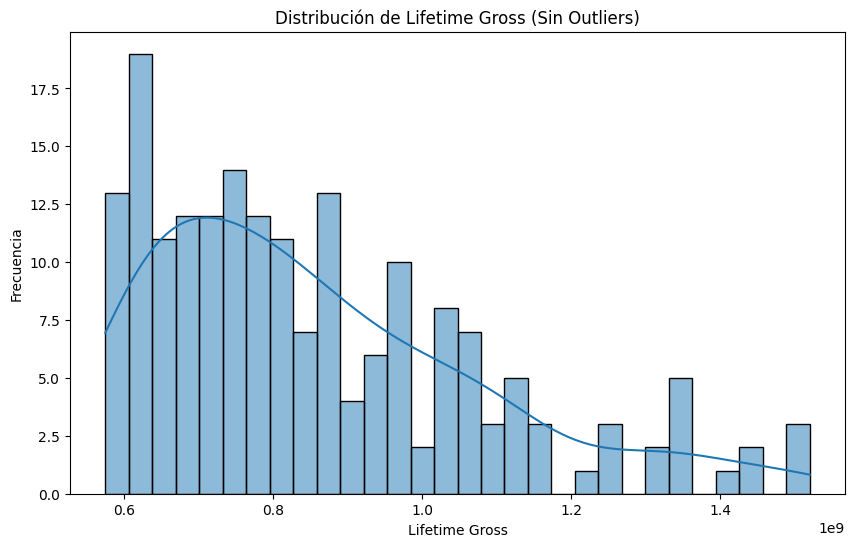

                            OLS Regression Results                            
Dep. Variable:         Lifetime Gross   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.86e-27
Time:                        16:34:07   Log-Likelihood:                -3780.2
No. Observations:                 186   AIC:                             7564.
Df Residuals:                     184   BIC:                             7571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.817e+08   3.16e+07     15.229      

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo especificado
file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/top_lifetime_gross_cleaned.xlsx'
new_movies_data = pd.read_excel(file_path)

# Convertir las columnas a formato numérico, eliminando caracteres no deseados
new_movies_data['Lifetime Gross'] = pd.to_numeric(new_movies_data['Lifetime Gross'].replace('[\$,]', '', regex=True), errors='coerce')
new_movies_data['Distributor'] = pd.to_numeric(new_movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

# Eliminar datos atípicos utilizando el método del IQR
Q1 = new_movies_data['Lifetime Gross'].quantile(0.25)
Q3 = new_movies_data['Lifetime Gross'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos atípicos
filtered_data = new_movies_data[~((new_movies_data['Lifetime Gross'] < (Q1 - 1.5 * IQR)) | (new_movies_data['Lifetime Gross'] > (Q3 + 1.5 * IQR)))]

# Visualizar el nuevo gráfico de la distribución de 'Lifetime Gross' sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Lifetime Gross'], bins=30, kde=True)
plt.title('Distribución de Lifetime Gross (Sin Outliers)')
plt.xlabel('Lifetime Gross')
plt.ylabel('Frecuencia')
plt.show()

# Preparar los datos para la regresión
X = filtered_data[['Distributor']].dropna()  # Puedes cambiar 'Distributor' a otras variables si es necesario
y = filtered_data['Lifetime Gross'].dropna()

# Alinear las variables dependientes e independientes
X, y = X.align(y, join='inner', axis=0)

# Agregar una constante a X
X = sm.add_constant(X)

# Ajustar el modelo de regresión OLS
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())



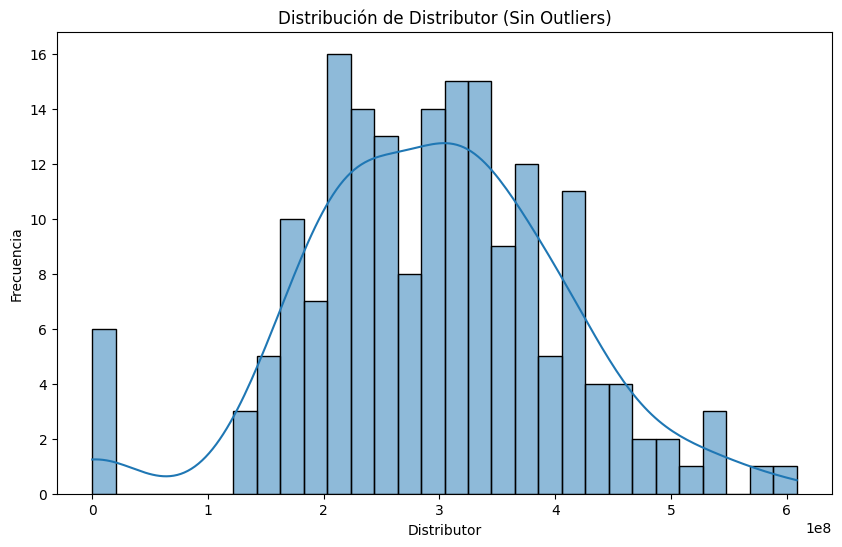

                            OLS Regression Results                            
Dep. Variable:            Distributor   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           4.80e-20
Time:                        17:01:19   Log-Likelihood:                -3565.4
No. Observations:                 181   AIC:                             7135.
Df Residuals:                     179   BIC:                             7141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.501e+07   2.68e+07      0.

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo especificado
file_path = 'C:/Users/Felipe Biatturi/Desktop/Proyecto ciencia de datos/top_lifetime_gross_cleaned.xlsx'
new_movies_data = pd.read_excel(file_path)

# Convertir las columnas a formato numérico, eliminando caracteres no deseados
new_movies_data['Lifetime Gross'] = pd.to_numeric(new_movies_data['Lifetime Gross'].replace('[\$,]', '', regex=True), errors='coerce')
new_movies_data['Distributor'] = pd.to_numeric(new_movies_data['Distributor'].replace('[\$,]', '', regex=True), errors='coerce')

# Eliminar datos atípicos utilizando el método del IQR
Q1 = new_movies_data['Distributor'].quantile(0.25)
Q3 = new_movies_data['Distributor'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos atípicos
filtered_data = new_movies_data[~((new_movies_data['Distributor'] < (Q1 - 1.5 * IQR)) | (new_movies_data['Distributor'] > (Q3 + 1.5 * IQR)))]

# Visualizar el nuevo gráfico de la distribución de 'Lifetime Gross' sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Distributor'], bins=30, kde=True)
plt.title('Distribución de Distributor (Sin Outliers)')
plt.xlabel('Distributor')
plt.ylabel('Frecuencia')
plt.show()

# Preparar los datos para la regresión
X = filtered_data[['Lifetime Gross']].dropna()  # Puedes cambiar 'Distributor' a otras variables si es necesario
y = filtered_data['Distributor'].dropna()

# Alinear las variables dependientes e independientes
X, y = X.align(y, join='inner', axis=0)

# Agregar una constante a X
X = sm.add_constant(X)

# Ajustar el modelo de regresión OLS
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())